In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [2]:
# Aluminum-water
c_1L = 6300.0 #Medium 1 longitudinal velocity - Aluminum
c_1T = 3100.0 #Medium 1 transverse velocity

c_2L = 1480.0  #Medium 2 longitudinal velocity - water
#Medium 2 longitudinal velocity na

c_N = c_1L # Wave velocity of the incident wave.
c_N = c_1L

rho_1 = 2.65 * 1000
rho_2 = 1.00 * 1000

poisson_1 = 0.32

In [3]:
if c_N == c_1L:
    in_mode = 'Longitudinal'
if c_N == c_1T:
    in_mode = 'Transverse'

In [4]:
# incoming angles
angles = np.linspace(0, np.pi/2, 91)

In [5]:
aT = (c_1T/c_N) * np.sin(angles)
aL = (c_1L/c_N) * np.sin(angles)

bL = (c_2L/c_N) * np.sin(angles)
aT = [x if x < 1 else 1 for x in aT]
aL = [x if x < 1 else 1 for x in aL]

bL = [x if x < 1 else 1 for x in bL]
alpha_T = np.arcsin(aT)
alpha_L = np.arcsin(aL)

beta_L = np.arcsin(bL)

In [6]:
#Critical angle:
if c_N < c_2L:
    print('First critical angle exists')
    crit_angle_1 = np.arcsin(c_N/c_2L)
    print(np.rad2deg(crit_angle_1))
else:
    crit_angle_1 = False

In [7]:
crit_angle_1

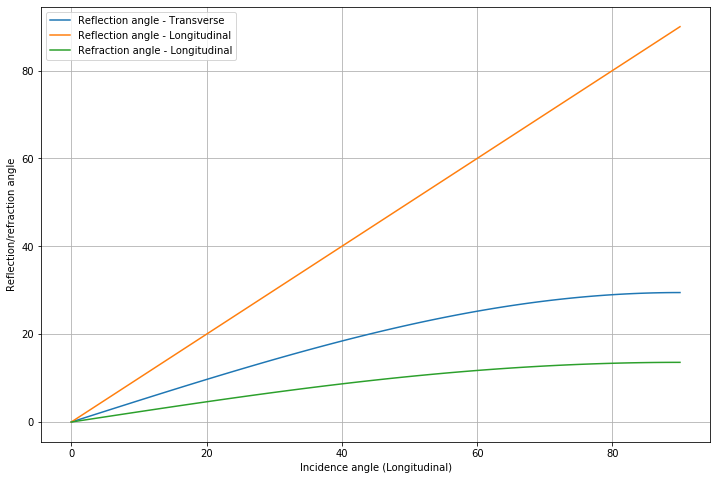

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(np.rad2deg(angles), np.rad2deg(alpha_T), label='Reflection angle - Transverse')
plt.plot(np.rad2deg(angles), np.rad2deg(alpha_L), label='Reflection angle - Longitudinal')
plt.plot(np.rad2deg(angles), np.rad2deg(beta_L), label='Refraction angle - Longitudinal')
plt.grid()
plt.legend()
plt.xlabel('Incidence angle (' + in_mode +')')
plt.ylabel('Reflection/refraction angle')
if crit_angle_1:
    plt.vlines(np.rad2deg(crit_angle_1), 0, 90, linestyles='dotted')
plt.show()

In [9]:
idx = 30
angle_coords = (-np.sin(angles[idx]), np.cos(angles[idx]))
alpha_T_coords = (np.sin(alpha_T[idx]), np.cos(alpha_T[idx]))
alpha_L_coords = (np.sin(alpha_L[idx]), np.cos(alpha_L[idx]))
beta_L_coords = (np.sin(beta_L[idx]), -np.cos(beta_L[idx]))

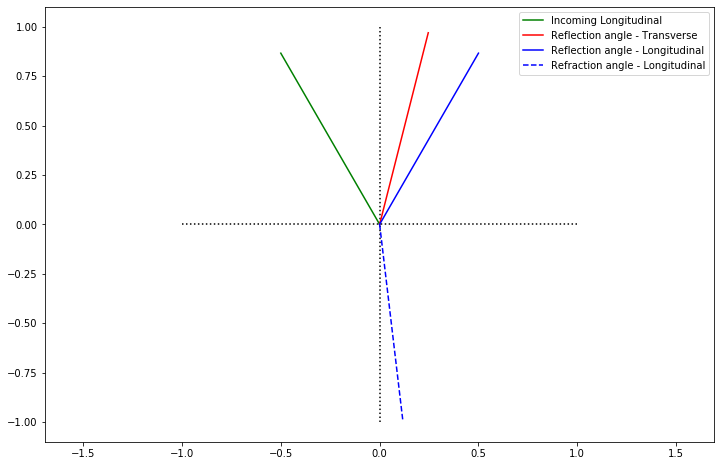

In [10]:
plt.figure(figsize=(12, 8))
plt.hlines(0, -1, 1, linestyles='dotted')
plt.vlines(0, -1, 1, linestyles='dotted')
plt.plot([angle_coords[0], 0], [angle_coords[1], 0], 'g-', label='Incoming ' + in_mode)
plt.plot([0, alpha_T_coords[0]], [0, alpha_T_coords[1]], 'r-', label='Reflection angle - Transverse')
plt.plot([0, alpha_L_coords[0]], [0, alpha_L_coords[1]], 'b-', label='Reflection angle - Longitudinal')
plt.plot([0, beta_L_coords[0]], [0, beta_L_coords[1]], 'b--', label='Refraction angle - Longitudinal')
plt.axis('equal')
plt.legend()

plt.show()

In [11]:
def f(idx):
    angle_coords = (-np.sin(angles[idx]), np.cos(angles[idx]))
    alpha_T_coords = (np.sin(alpha_T[idx]), np.cos(alpha_T[idx]))
    alpha_L_coords = (np.sin(alpha_L[idx]), np.cos(alpha_L[idx]))
    beta_L_coords = (np.sin(beta_L[idx]), -np.cos(beta_L[idx]))
    
    plt.figure(figsize=(12, 8))
    plt.hlines(0, -1, 1, linestyles='dotted')
    plt.vlines(0, -1, 1, linestyles='dotted')
    plt.plot([angle_coords[0], 0], [angle_coords[1], 0], 'g-', label='Incoming ' + in_mode)
    plt.plot([0, alpha_T_coords[0]], [0, alpha_T_coords[1]], 'r-', label='Reflected Transverse' )
    plt.plot([0, alpha_L_coords[0]], [0, alpha_L_coords[1]], 'b-', label='Reflected Longitudinal')
    plt.plot([0, beta_L_coords[0]], [0, beta_L_coords[1]], 'b--', label='Refracted Longitudinal')
    plt.legend()
    plt.axis('equal')

    plt.show()

In [12]:
%matplotlib inline
from ipywidgets import interactive

In [13]:
interactive_plot = interactive(f, idx=(0, 90))
interactive_plot

interactive(children=(IntSlider(value=45, description='idx', max=90), Output()), _dom_classes=('widget-interac…

## Slowness Profiles

In [14]:
s_1L = 1/c_1L
s_1T = 1/c_1T
s_2L = 1/c_2L
s_N = 1/c_N

In [15]:
s_Nx, s_Ny = -s_N*np.sin(angles), s_N*np.cos(angles)
s_1Lx, s_1Ly = s_1L*np.sin(angles), s_1L*np.cos(angles)
s_1Tx, s_1Ty = s_1T*np.sin(angles), s_1T*np.cos(angles)
s_2Lx, s_2Ly = s_2L*np.sin(angles), -s_2L*np.cos(angles)

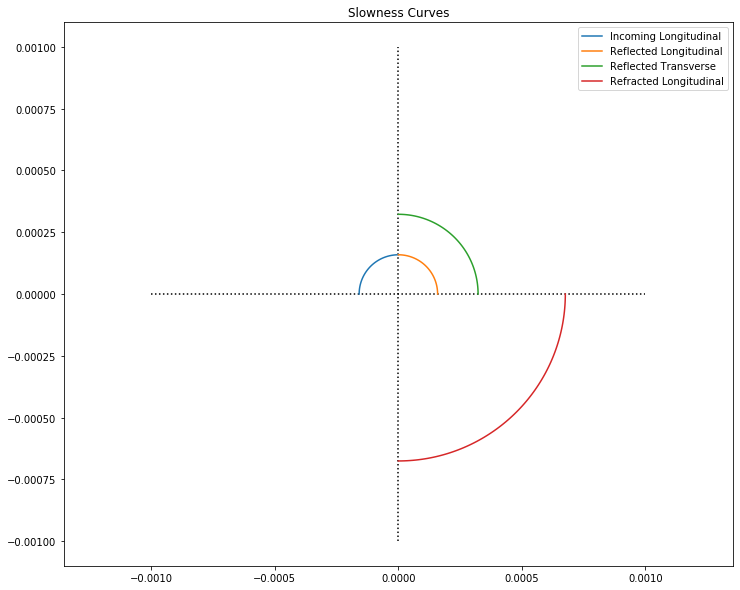

In [16]:
plt.figure(figsize=(12, 10))
plt.hlines(0, -0.001, 0.001, linestyles='dotted')
plt.vlines(0, -0.001, 0.001, linestyles='dotted')
plt.plot(s_Nx, s_Ny, label='Incoming ' + in_mode)
plt.plot(s_1Lx, s_1Ly, label='Reflected Longitudinal')
plt.plot(s_1Tx, s_1Ty, label='Reflected Transverse')
plt.plot(s_2Lx, s_2Ly, label='Refracted Longitudinal')

plt.legend()
plt.title('Slowness Curves')

plt.axis('equal')
plt.show()

In [17]:
def f_slow(idx):
    xmax = max([max(np.abs(s_1Lx)), max(np.abs(s_1Tx)), max(np.abs(s_2Lx)), max(np.abs(s_Nx))])
    ymax = max([max(np.abs(s_1Ly)), max(np.abs(s_1Ty)), max(np.abs(s_2Ly)), max(np.abs(s_Ny))])
    angle_coords = tuple(s_N*np.array([-np.sin(angles[idx]), np.cos(angles[idx])]))
    alpha_T_coords = tuple(s_1T*np.array([np.sin(alpha_T[idx]), np.cos(alpha_T[idx])]))
    alpha_L_coords = tuple(s_1L*np.array([np.sin(alpha_L[idx]), np.cos(alpha_L[idx])]))
    beta_L_coords = tuple(s_2L*np.array([np.sin(beta_L[idx]), -np.cos(beta_L[idx])]))
    k = -angle_coords[0]
    
    plt.figure(figsize=(12, 8))
    plt.vlines(0, -1.1*ymax, 1.1*ymax, linestyles='dotted')
    plt.hlines(0, -1.1*xmax, 1.1*xmax, linestyles='dotted')
    #plt.hlines(0, linestyles='dotted')
    #plt.vlines(0, linestyles='dotted')
    plt.vlines(k, -1.1*ymax, 1.1*ymax, linestyles='dashed')
    plt.plot(s_1Lx, s_1Ly, 'b')
    plt.plot(s_1Tx, s_1Ty, 'r')
    plt.plot(s_2Lx, s_2Ly, 'b')
    plt.plot(s_Nx, s_Ny, 'g')

    plt.plot([angle_coords[0], 0], [angle_coords[1], 0], 'g-', label='Incoming ' + in_mode)
    plt.plot([0, alpha_T_coords[0]], [0, alpha_T_coords[1]], 'r-', label='Reflected Transverse' )
    plt.plot([0, alpha_L_coords[0]], [0, alpha_L_coords[1]], 'b-', label='Reflected Longitudinal')
    plt.plot([0, beta_L_coords[0]], [0, beta_L_coords[1]], 'b--', label='Refracted Longitudinal')
    plt.legend()
    plt.axis('equal')
    plt.xlabel('kx - wavenumber x-component')
    plt.ylabel('kz - wavenumber z-component')

    plt.show()

In [18]:
%matplotlib inline

In [19]:
interactive_plot2 = interactive(f_slow, idx=(0, 90))
interactive_plot2

interactive(children=(IntSlider(value=45, description='idx', max=90), Output()), _dom_classes=('widget-interac…

## Reflection and Refraction Factors

In [20]:
k_1L = 1/c_1L
k_1T = 1/c_1T
k_2L = 1/c_2L

mu_1 = c_1T * c_1T * rho_1
mu_2 = 0

#lam_1 = (2*mu_1*poisson_1) / (1-2*poisson_1)
lam_1 = rho_1 * c_1L**2 - 2*mu_1
lam_2 = rho_2 * c_2L**2 - 2*mu_2

In [21]:
RL = np.zeros(len(angles)) 
RT = np.zeros(len(angles))
SL = np.zeros(len(angles))

for idx in range(len(angles)):
    M = np.array([
        [-np.cos(alpha_L[idx]), np.sin(alpha_T[idx]), -np.cos(beta_L[idx])],
        [-k_1L*(lam_1 + 2*mu_1)*np.cos(2*alpha_T[idx]), k_1T*mu_1*np.sin(2*alpha_T[idx]), k_2L*lam_2],
        [-k_1L*mu_1*np.sin(2*alpha_L[idx]), -k_1T*mu_1*np.cos(2*alpha_T[idx]), 0]
        ])
    a_T = np.array([
        [np.sin(alpha_T[idx])],
        [-k_1T*mu_1*np.sin(2*alpha_T[idx])],
        [-k_1T*mu_1*np.cos(2*alpha_T[idx])]
        ])
    a_L = np.array([
        [-np.cos(alpha_L[idx])],
        [k_1L*(lam_1 + 2*mu_1)*np.cos(2*alpha_T[idx])],
        [-k_1L*mu_1*np.sin(2*alpha_L[idx])]
        ])
#    a_T = np.array([
#        [np.sin(alpha_T[idx])],
#        [np.cos(alpha_T[idx])],
#        [-k_1T*mu_1*np.sin(2*alpha_T[idx])]
#        ])
#    a_L = np.array([
#        [-np.cos(alpha_L[idx])],
#        [np.sin(alpha_L[idx])],
#        [k_1L*(lam_1 + 2*mu_1)*np.cos(2*alpha_T[idx])]
#        ])
    
    if in_mode == 'Longitudinal':
        x = np.linalg.solve(M, a_L)
        #print('Solved for Longitudinal incident wave')
    if in_mode == 'Transverse':
        x = np.linalg.solve(M, a_T)
        #print('Solved for Transverse incident wave')
    RL[idx] = x[0]
    RT[idx] = x[1]
    SL[idx] = x[2]

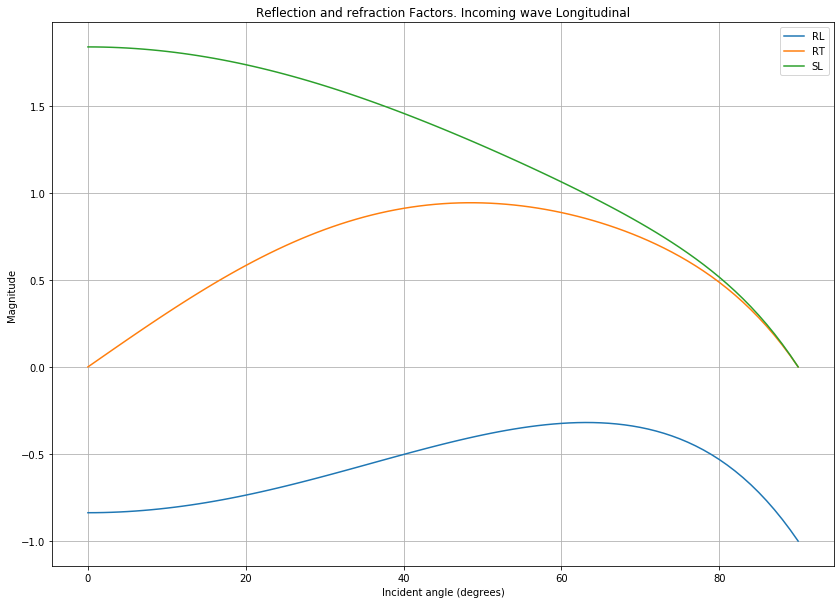

In [22]:
plt.figure(figsize=(14, 10))
plt.plot(np.rad2deg(angles), RL, label='RL')
plt.plot(np.rad2deg(angles), RT, label='RT')
plt.plot(np.rad2deg(angles), SL, label='SL')
plt.legend()
plt.title('Reflection and refraction Factors. Incoming wave ' + in_mode)
plt.xlabel('Incident angle (degrees)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

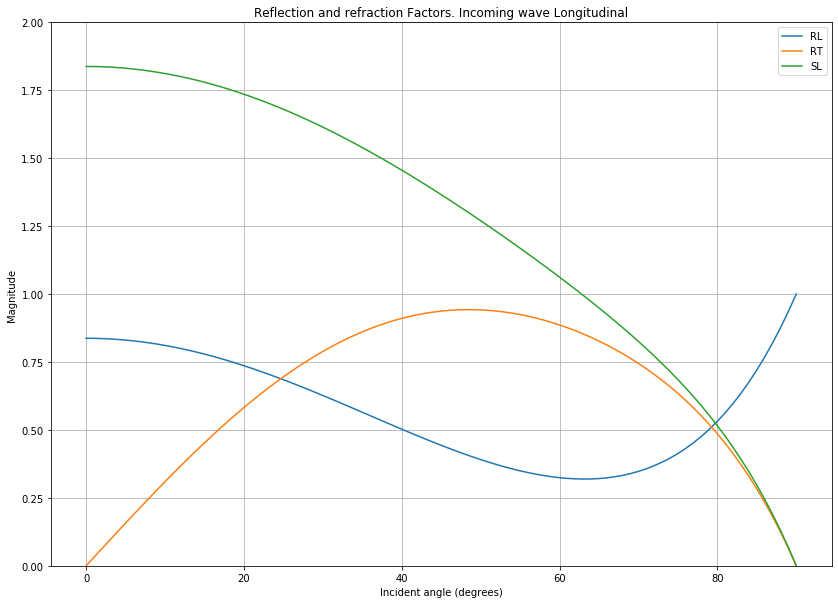

In [24]:
plt.figure(figsize=(14, 10))
plt.plot(np.rad2deg(angles), np.abs(RL), label='RL')
plt.plot(np.rad2deg(angles), np.abs(RT), label='RT')
plt.plot(np.rad2deg(angles), np.abs(SL), label='SL')
plt.legend()
plt.title('Reflection and refraction Factors. Incoming wave ' + in_mode)
plt.xlabel('Incident angle (degrees)')
plt.ylabel('Magnitude')
plt.ylim((0, 2))
plt.grid()
plt.show()